# Karakteranalyse av Frankenstein

Notebook for å undersøke korpus med metadata


In [1]:
import urllib.request, shutil
with urllib.request.urlopen("https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py") as response, open("module_update.py", 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
from module_update import update, css
css()

In [2]:
update('graph_networkx_louvain')

File C:\Users\larsj\Documents\GitHub\Literary_analysis\graph_networkx_louvain.py exists - call `update('graph_networkx_louvain', overwrite = True)` in order to download module `graph_networkx_louvain` anyway

In [3]:
import graph_networkx_louvain as gnl
import nbtext as nb
from nbtext import Corpus, check_navn
%matplotlib inline

In [4]:
frank = nb.get_urn({'title':'frank%', 'author':"shelley%",'year':1800, 'next':250})

In [5]:
frank

[[2015052808135, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 1976],
 [2011072508006, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 2004],
 [2013010708229,
  'Shelley, Mary Wollstonecraft',
  'Frankenstein, eller Den moderne Promethevs',
  2005],
 [2008022000084, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 1995],
 [2011110906074,
  'Shelley, Mary Wollstonecraft',
  'Frankenstein, eller Den moderne Promethevs',
  2010],
 [2013013008321, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 2012],
 [2008011101010, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 1993]]

In [28]:
def check_navn(navn, limit=2, remove='Ja Nei Nå Dem De Deres Unnskyld Ikke Ah Hmm Akk Farvel'.split(), add='skapningen'.split()):
    """Removes all items in navn with frequency below limit and words in all case as well as all words in list 'remove'"""
    r = {x:navn[x] for x in navn  if navn[x] > limit and x.upper() != x and not x in remove}
    return r

In [17]:
nb.word_freq(frank[0][0],'skapningen'.split())

{'skapningen': 9}

In [29]:
from nbtext import word_freq
import requests
def navn(urn, adds = None):
    if adds == None:
        adds = []
    if type(urn) is list:
        urn = urn[0]
    r = requests.get('https://api.nb.no/ngram/tingnavn', json={'urn':urn})
    r = dict(r.json())
    q = word_freq(urn, adds)
    for w in q:
        r[w] = q[w]
    return r

## Karakternettverk pr. bok

Hver bok får et karakternettverk

In [36]:
n0 = nb.make_network(frank[0], check_navn(navn(frank[0], 'skapningen'.split()), 3))
n1 = nb.make_network(frank[1], check_navn(navn(frank[1], 'skapningen'.split()), 3))
n2 = nb.make_network(frank[2], check_navn(navn(frank[2], 'skapningen'.split()), 3))

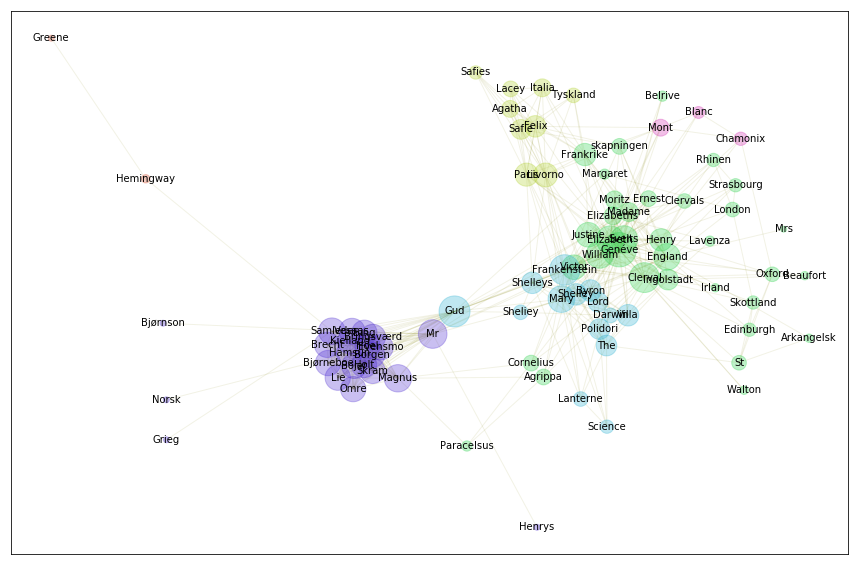

In [37]:
gnl.show_graph(n0)

In [38]:
gnl.show_community(n0)

1 Paris, Safies, Italia, Livorno, Tyskland, Safie, Agatha, Lacey, Felix

2 Arkangelsk, Victor, Elizabeth, skapningen, Strasbourg, Clervals, Justine, Frankrike, Henry, Agrippa, Lavenza, Sveits, Rhinen, Moritz, Irland, Walton, Oxford, England, Belrive, William, Genéve, Paracelsus, Ernest, Beaufort, Edinburgh, London, Clerval, Ingolstadt, Margaret, Madame, Skottland, Elizabeths, Cornelius, St, Mrs

3 Mary, Gud, Shelley, Lord, Frankenstein, The, Byron, Lanterne, Darwin, Polidori, Villa, Sheliey, Shelleys, Science

4 Bjørneboe, Holt, Magnus, Kielland, Vesaas, Omre, Brecht, Lie, Evensmo, Hamsun, Henrys, Samlede, Bing, Hoel, Bjørnson, Bringsværd, Norsk, Bojer, Grieg, Borgen, Mr, Skram

5 Blanc, Chamonix, Mont

6 Greene, Hemingway



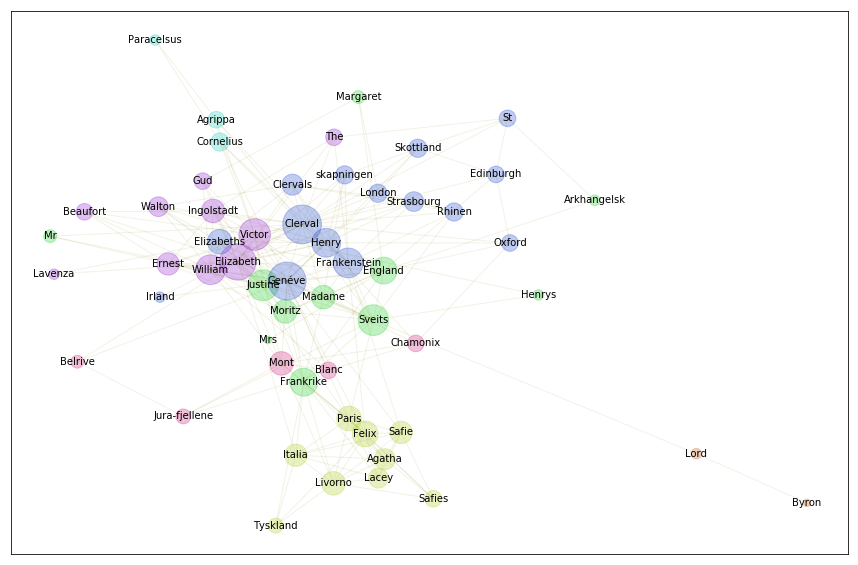

In [39]:
gnl.show_graph(n1)

In [40]:
gnl.show_community(n1)

1 Paris, Safies, Italia, Livorno, Tyskland, Safie, Agatha, Lacey, Felix

2 Frankrike, Mr, Henrys, England, Arkhangelsk, Sveits, Moritz, Margaret, Madame, Justine, Mrs

3 Paracelsus, Agrippa, Cornelius

4 Henry, Oxford, Clerval, Frankenstein, Rhinen, skapningen, Genéve, Skottland, Elizabeths, Edinburgh, Irland, Strasbourg, Clervals, St, London

5 Gud, Walton, Victor, Lavenza, Elizabeth, William, Ingolstadt, Ernest, The, Beaufort

6 Mont, Belrive, Blanc, Jura-fjellene, Chamonix

7 Byron, Lord



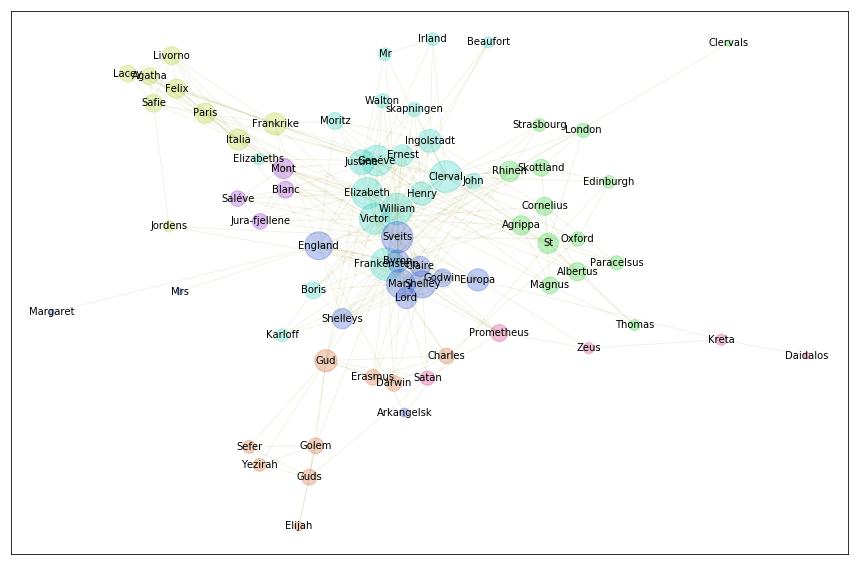

In [43]:
gnl.show_graph(n2)

In [44]:
gnl.show_community(n2)

1 Frankrike, Paris, Italia, Livorno, Jordens, Safie, Agatha, Lacey, Felix

2 Agrippa, Oxford, Albertus, Rhinen, Magnus, Paracelsus, Skottland, Cornelius, Edinburgh, Strasbourg, Clervals, St, London, Thomas

3 Henry, Mr, Victor, Walton, Clerval, Frankenstein, Elizabeth, William, Ingolstadt, Genéve, Ernest, skapningen, Moritz, John, Beaufort, Irland, Boris, Elizabeths, Karloff, Justine

4 Mary, Arkangelsk, Shelley, Lord, England, Sveits, Godwin, Byron, Margaret, Claire, Shelleys, Europa, Mrs

5 Blanc, Jura-fjellene, Saléve, Mont

6 Daidalos, Zeus, Satan, Kreta, Prometheus

7 Erasmus, Gud, Golem, Elijah, Sefer, Yezirah, Charles, Darwin, Guds



In [ ]:
nb.central_betweenness_characters(creation, n=500)